In [19]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from L1_DataMining.DataMining import Miner, read_data, get_hashtags
import secret

# set communities ids
GaGaGames = 'gagagames'
HobbyGames = 'hobby_games'

# create Miner instance using API token from secrets
data_miner = Miner(secret.get('token'))

In [9]:
connections = read_data('data/connections')
GaGaGamesMembers = read_data(f"data/{GaGaGames}_members", "values")
HobbyGamesMembers = read_data(f"data/{HobbyGames}_members", "values")

Nodes: 1480
Edges: 1235


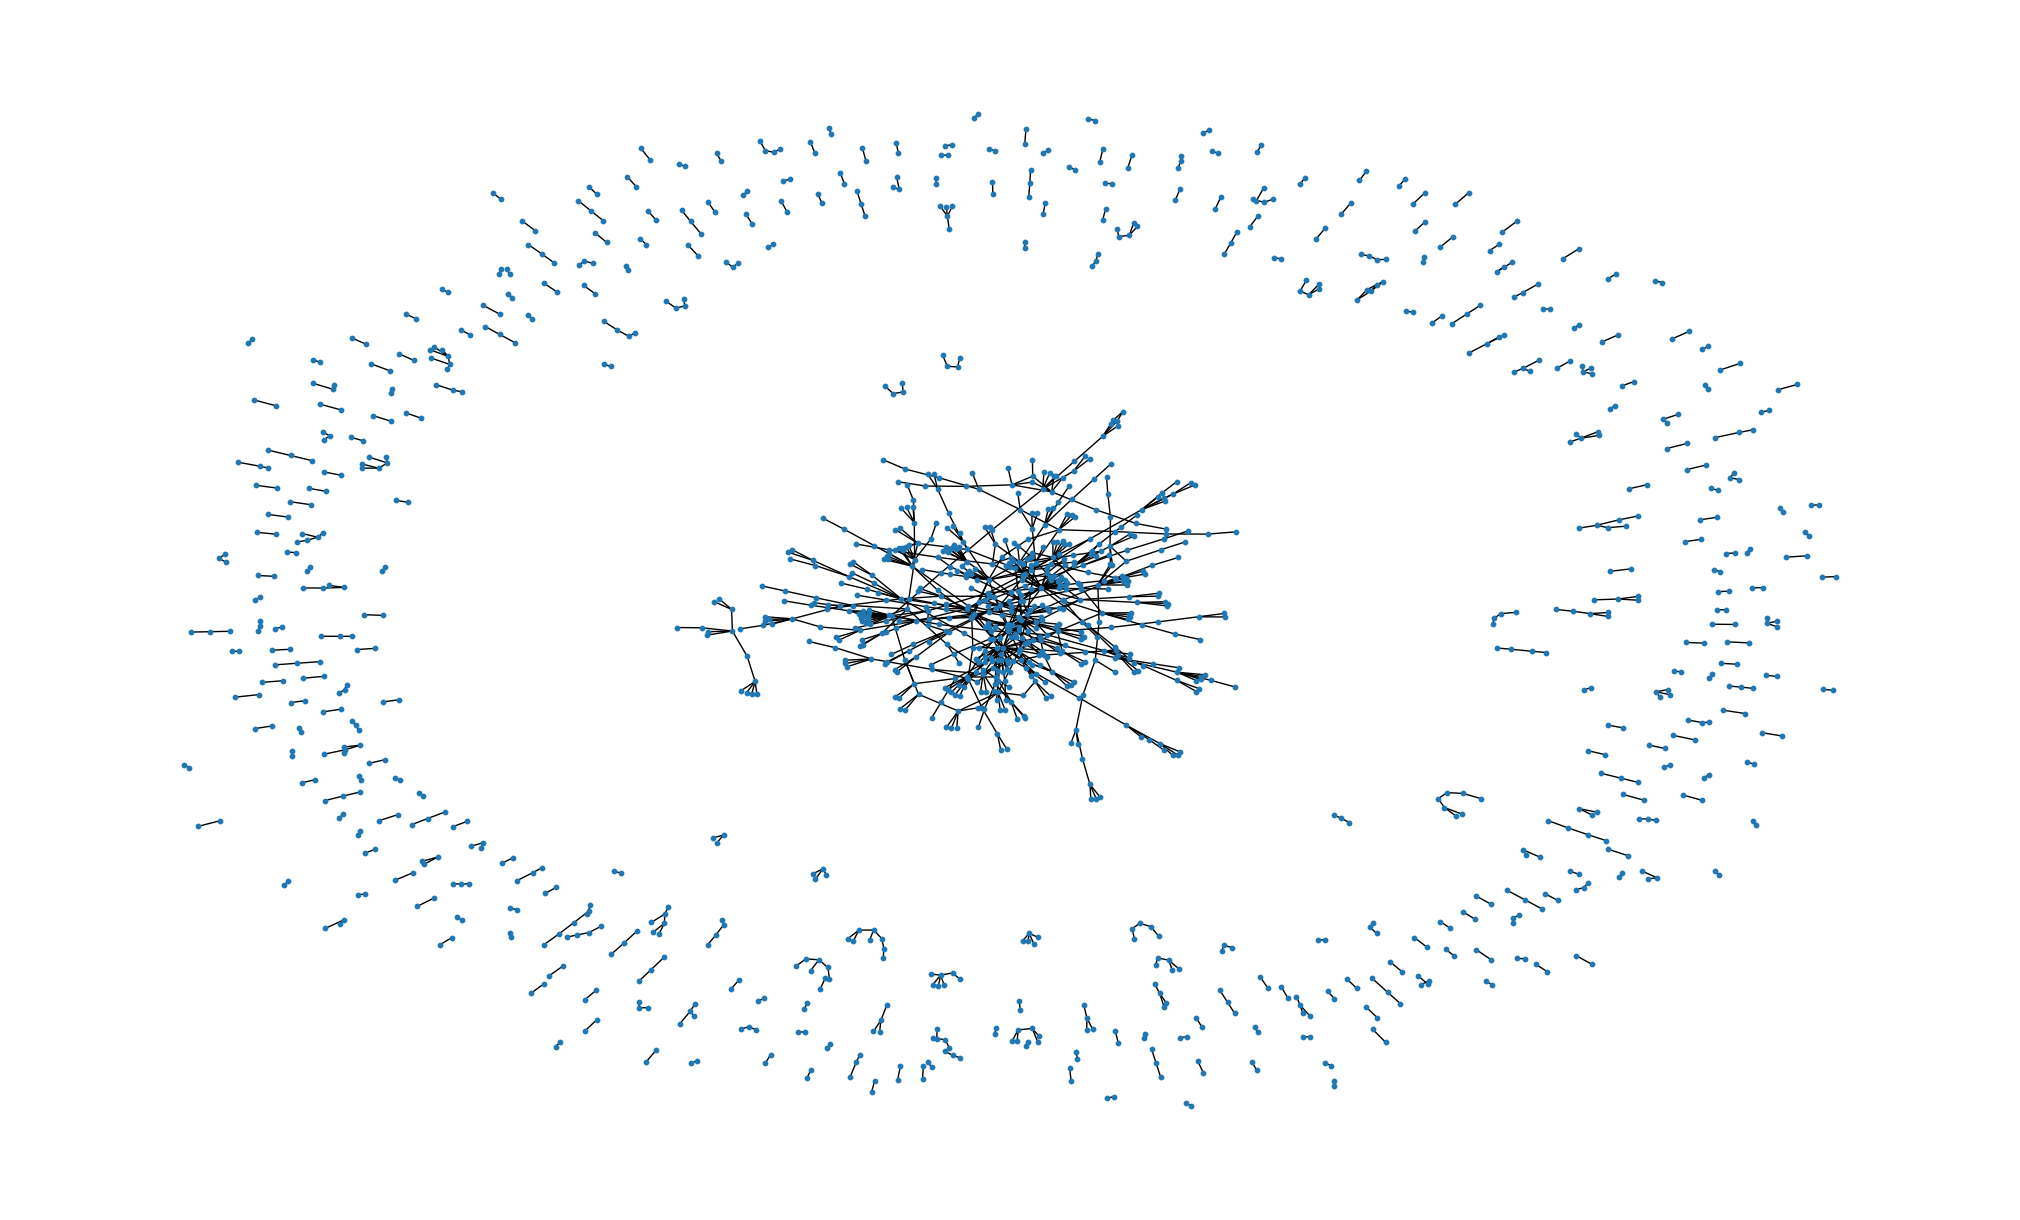

In [14]:
import networkx as nx

G = nx.from_pandas_edgelist(connections, source='member', target='friend').to_undirected()
print(f"Nodes: {len(G.nodes)}\nEdges: {len(G.edges)}")
plt.figure(figsize=(20, 12))
nx.draw(G, node_size=10)

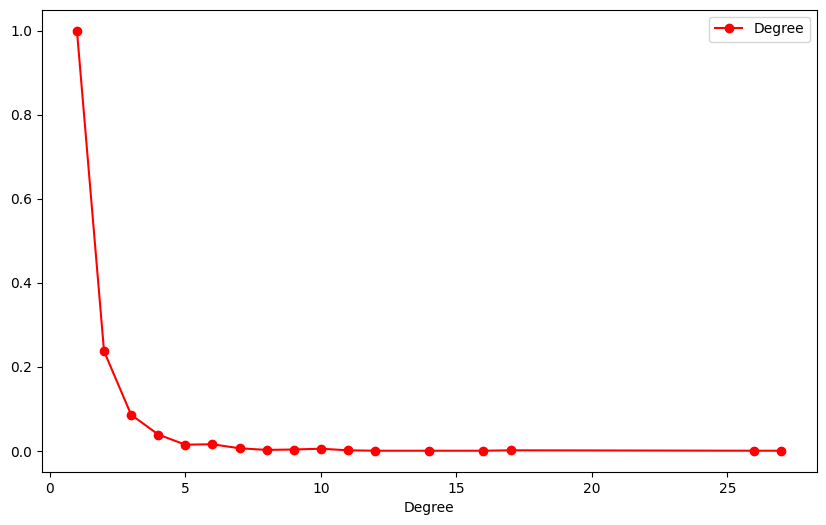

In [21]:
degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 6))
cmin, cmax = min(hist), max(hist)
hist = [(i - cmin) / (cmax - cmin) for i in hist]
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.show()

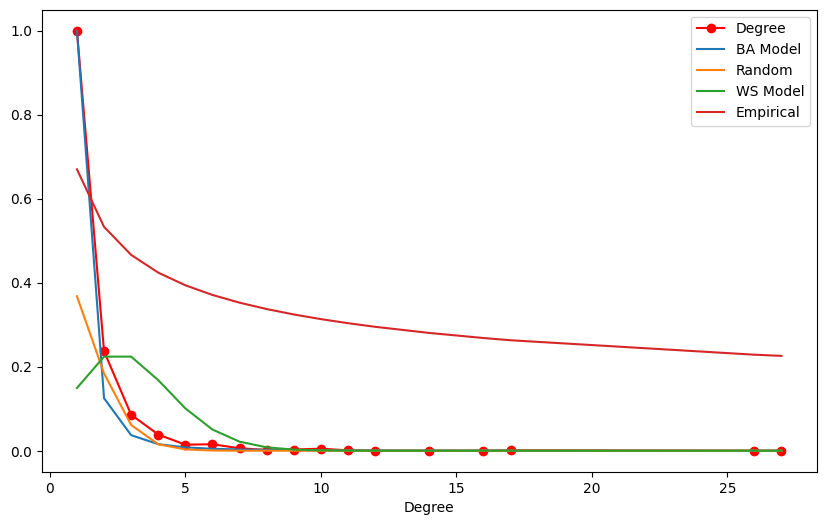

In [27]:
import math

degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 6))
cmin, cmax = min(hist), max(hist)
hist = [(i - cmin) / (cmax - cmin) for i in hist]

plt.plot(degree_values, hist, 'ro-')
plt.plot(degree_values, [i ** (-3) for i in degree_values])
plt.plot(degree_values, [1 ** i * math.e ** (-1) / math.factorial(i) for i in degree_values])
plt.plot(degree_values, [3 ** i * math.e ** (-3) / math.factorial(i) for i in degree_values])
plt.plot(degree_values, [0.67 * i ** (0.67 - 1) for i in degree_values])

plt.legend(['Degree', 'BA Model', 'Random', 'WS Model', 'Empirical'])
plt.xlabel('Degree')
plt.show()

In [28]:
nx.average_clustering(G)

0.032861474905592554

In [33]:
counter = 0
avg_path = 0

for c in nx.connected_components(G):
    counter += 1
    avg_path += nx.average_shortest_path_length(G.subgraph(c))

avg_path / counter

1.180714068447669

In [38]:
import pandas as pd

n = nx.number_of_nodes(G)
k = np.mean([G.degree[i] for i in G.nodes()])
df = pd.DataFrame(
    [
        {
            'param': 'C',
            'Random': k / n,
            'BA model': n ** (-0.75),
            'WS model': 'const (~0.75)',
            'Empirical': 'large'
        },
        {
            'param': '<L>',
            'Random': np.log2(n) / np.log2(k),
            'BA model': np.log2(n) / np.log2(np.log2(n)),
            'WS model': np.log2(n),
            'Empirical': 'small'
        }
    ]
)

df.set_index('param')

,Random,BA model,WS model,Empirical
param,,,,
C,0.001128,0.004191,const (~0.75),large
<L>,14.252516,3.100545,10.531381,small
